In [18]:
import numpy as np
from logistic_regression import *
from SVM import *
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../hw1/')
from gradient_descent import GradientDescent, quad, quadGrad
import scipy.io
import scipy.optimize
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
def trainTitanic(lam, type="train", rescale=True, useGradientCriterion=True, stepSize=0.01, maxFunctionCalls=10000,
                 tol=1e-8, plotIter=True, printSummary=True):
    lr = LogisticRegression.fromTitanic(type=type, rescale=rescale, rescaleMethod="interval")
    w_guess = np.zeros(12)
    w_full = lr.computeDecisionBoundary(w_guess, lam, printSummary=printSummary, stepSize=stepSize, plotIter=plotIter,
                                       useGradientCriterion=useGradientCriterion, maxFunctionCalls=maxFunctionCalls,
                                       tol=tol)
    
#     print ""
#     print "w_full = " + str(w_full)
#     print ""

    lr_test = LogisticRegression.fromTitanic(type="test", rescale=rescale)
    lr_val = LogisticRegression.fromTitanic(type="validate", rescale=rescale)

    if printSummary:
    
        print ""
        print "--Train--"
        cer_train,_ = lr.classificationErrorRate(w_full,verbose=True)
        print "------------"
        print ""

        print ""
        print "--Test--"
        cer_test, _ = lr_test.classificationErrorRate(w_full,verbose=True)
        print "------------"
        print ""
       
        print ""
        print "--Validate--"
        cer_val, _ = lr_val.classificationErrorRate(w_full,verbose=True)
        print "------------"
        print ""
        
    else:
        cer_train,_ = lr.classificationErrorRate(w_full,verbose=False)
        cer_test, _ = lr_test.classificationErrorRate(w_full,verbose=False)
        cer_val, _ = lr_val.classificationErrorRate(w_full,verbose=False)
    
    return np.array([cer_train, cer_test, cer_val])
    

In [20]:
#lam = .2
#a = trainTitanic(lam, rescale=False, printSummary=True, plotIter=True, stepSize=0.00001, maxFunctionCalls=100e3)
#print np.shape(a)

In [21]:
# N = 60
# lambda_vals = np.linspace(0,8,N)
# cer = np.zeros((N,3))
# for idx, lam in enumerate(lambda_vals):
#     cer[idx,:] = trainTitanic(lam, printSummary=False, plotIter=False)

# plt.plot(lambda_vals, cer[:,0], color='r', label="train")
# plt.plot(lambda_vals, cer[:,1], color='g', label="test")
# plt.plot(lambda_vals, cer[:,2], color='b', label="val")
# # plt.legend(loc='best')
# plt.legend()
# plt.xlabel('lambda')
# plt.ylabel("classification error rate")
# plt.show()
# print cer

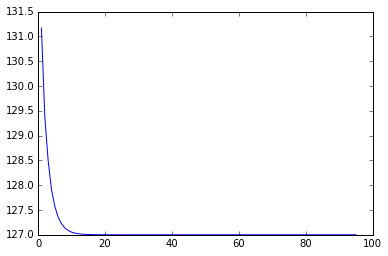

array([ 0.375     ,  0.39153439,  0.382     ])

In [22]:
lam = 50
trainTitanic(lam, printSummary=False, plotIter=True)

In [23]:
#lr.fromTitanic(type="test")
#print np.shape(lr.x)

 
--- Minimization Summary --- 
x_min is = [-0.85484944  0.35836282  0.33523583 -0.69359864  1.64089677 -0.26719336
 -0.00429251  0.23077402  0.15791133 -0.25596015  0.22996793  0.02599222]
f_min is = 101.053992266
achieved tolerance = 9.99051535944e-09
numFunctionCalls = 706
---------------------------- 
 
--- Classification Summary ---
w_full = [-0.85484944  0.35836282  0.33523583 -0.69359864  1.64089677 -0.26719336
 -0.00429251  0.23077402  0.15791133 -0.25596015  0.22996793  0.02599222]
w_full normalized = [-0.40689241  0.17057402  0.15956601 -0.33014003  0.78103629 -0.12717906
 -0.00204316  0.10984413  0.07516285 -0.12183226  0.10946045  0.01237181]
norm of w_full = 2.10092256476
lambda = 2.5
number of entries missclassified = 31
missclassification rate  = 0.155
------------------



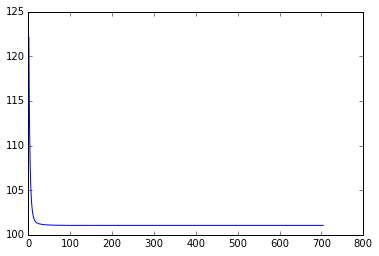


--Train--
number of entries missclassified = 31
missclassification rate  = 0.155
------------


--Test--
number of entries missclassified = 44
missclassification rate  = 0.232804232804
------------


--Validate--
number of entries missclassified = 93
missclassification rate  = 0.186
------------



array([ 0.155     ,  0.23280423,  0.186     ])

In [24]:
lam = 2.5
trainTitanic(lam)

In [33]:
def trainTitanicSVM(typef="train", rescale=True, printSummary=True, kernel="linear", C=1.0, bandwidth=1.0):
    svm = SVM.fromTitanic(typef=typef, rescale=rescale, rescaleMethod="interval", kernel=kernel, C=C, bandwidth=bandwidth)
    svm.computeSolution()
    print svm.theta
    
    if printSummary:
    
        print ""
        print "--Train--"
        cer_train,_ = svm.CER_type(typef="train", rescale=rescale, verbose=True, rescaleMethod="interval")
        print "------------"
        print ""

        print ""
        print "--Test--"
        cer_test, _ = svm.CER_type(typef="test", rescale=rescale, verbose=True, rescaleMethod="interval")
        print "------------"
        print ""
       
        print ""
        print "--Validate--"
        cer_val,_ = svm.CER_type(typef="validate", rescale=rescale, verbose=True, rescaleMethod="interval")
        print "------------"
        print ""
        
    else:
        cer_train,_ = svm.CER_type(typef="train", rescale=rescale, verbose=False, rescaleMethod="interval")
        cer_test, _ = svm.CER_type(typef="test", rescale=rescale, verbose=False, rescaleMethod="interval")
        cer_val, _ = svm.CER_type(typef="validate", rescale=rescale, verbose=False, rescaleMethod="interval")
    
    print svm.theta
    return np.array([cer_train, cer_test, cer_val])
    

yes I rescaled
     pcost       dcost       gap    pres   dres
 0: -5.5284e+01 -1.1925e+00  2e+03  4e+01  2e-15
 1: -2.4882e+00 -1.0246e+00  4e+01  1e+00  2e-15
 2: -4.4499e-01 -5.2227e-01  3e+00  8e-02  7e-16
 3: -1.4299e-01 -4.1844e-01  3e-01  1e-17  2e-15
 4: -1.4750e-01 -1.6422e-01  2e-02  1e-17  6e-16
 5: -1.4796e-01 -1.5143e-01  3e-03  1e-17  4e-16
 6: -1.4898e-01 -1.4987e-01  9e-04  6e-18  5e-16
 7: -1.4922e-01 -1.4937e-01  1e-04  3e-18  5e-16
 8: -1.4927e-01 -1.4931e-01  4e-05  7e-18  4e-16
 9: -1.4928e-01 -1.4930e-01  2e-05  5e-18  4e-16
10: -1.4928e-01 -1.4930e-01  1e-05  7e-18  4e-16
11: -1.4929e-01 -1.4930e-01  1e-05  4e-18  4e-16
12: -1.4929e-01 -1.4929e-01  5e-06  1e-17  4e-16
13: -1.4929e-01 -1.4929e-01  3e-07  4e-18  5e-16
14: -1.4929e-01 -1.4929e-01  3e-09  3e-18  6e-16
Optimal solution found.
[ 0.00200003  0.00300003 -0.00499976  0.036      -0.0027884  -0.000371
  0.00293754  0.00297157 -0.00465608  0.00600001 -0.00134362]
yes I rescaled
yes I rescaled
yes I rescaled


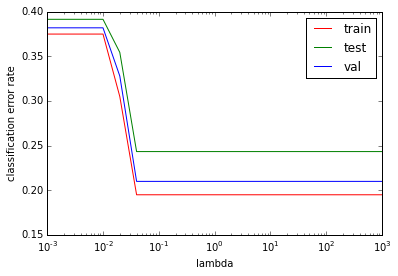

[[ 0.375       0.375       0.375       0.375       0.305       0.195       0.195
   0.195       0.195       0.195       0.195       0.195       0.195       0.195
   0.195       0.195     ]
 [ 0.39153439  0.39153439  0.39153439  0.39153439  0.35449735  0.24338624
   0.24338624  0.24338624  0.24338624  0.24338624  0.24338624  0.24338624
   0.24338624  0.24338624  0.24338624  0.24338624]
 [ 0.382       0.382       0.382       0.382       0.328       0.21        0.21
   0.21        0.21        0.21        0.21        0.21        0.21        0.21
   0.21        0.21      ]]


In [34]:
C = [0.001, 0.002, 0.004, 0.01, 0.02, 0.04, 1, 2, 4, 10, 20, 40, 100, 200, 400, 1000]
#C = [1]
cer = np.zeros((3,len(C)))

for i in range(len(C)):
    a = trainTitanicSVM(typef="train", rescale=True, printSummary=False, C = C[i])
    cer[:,i] = a
    
plt.semilogx(C, cer[0,:], color='r', label="train")
plt.semilogx(C, cer[1,:], color='g', label="test")
plt.semilogx(C, cer[2,:], color='b', label="val")
# plt.legend(loc='best')
plt.legend()
plt.xlabel('lambda')
plt.ylabel("classification error rate")
plt.show()
print cer

In [27]:
print cer

[[ 0.36        0.585       0.565       0.435       0.23        0.23        0.23
   0.23      ]
 [ 0.36507937  0.59259259  0.57142857  0.37037037  0.24867725  0.23809524
   0.22751323  0.23280423]
 [ 0.372       0.6         0.578       0.39        0.226       0.24        0.234
   0.238     ]]


In [28]:
a = trainTitanicSVM(typef="validate", rescale=False, kernel="Gaussian", C=100, bandwidth=10)


     pcost       dcost       gap    pres   dres
 0:  5.7503e+04 -1.6832e+06  2e+06  4e-13  9e-14
 1:  1.3844e+04 -2.2334e+05  2e+05  2e-14  8e-14
 2: -4.1692e+03 -9.6238e+04  9e+04  4e-13  9e-14
 3: -1.0379e+04 -3.3900e+04  2e+04  4e-14  9e-14
 4: -1.2882e+04 -2.3672e+04  1e+04  2e-15  1e-13
 5: -1.4174e+04 -1.7963e+04  4e+03  5e-14  1e-13
 6: -1.4583e+04 -1.6448e+04  2e+03  1e-13  1e-13
 7: -1.4799e+04 -1.5665e+04  9e+02  7e-15  1e-13
 8: -1.4938e+04 -1.5205e+04  3e+02  6e-15  1e-13
 9: -1.4994e+04 -1.5059e+04  7e+01  1e-13  2e-13
10: -1.5007e+04 -1.5027e+04  2e+01  3e-14  2e-13
11: -1.5012e+04 -1.5016e+04  4e+00  6e-14  2e-13
12: -1.5013e+04 -1.5014e+04  7e-01  2e-14  2e-13
13: -1.5013e+04 -1.5013e+04  2e-01  3e-13  2e-13
14: -1.5013e+04 -1.5013e+04  6e-03  4e-13  2e-13
Optimal solution found.
[  159.74708122   167.59094416  -327.33802538  1510.12019784    99.6875226
   -27.9054509    -45.6090341   2612.95043155   -80.2865179     89.11811468
    -8.83159678]

--Train--
number of entr